In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
import random

class Pixel:
    def __init__(self, age, pixel_type):
        self.age = age
        self.pixel_type = pixel_type

consider_global_ratio = False
global_ratio = 0 # it's pointless to change

consider_trend =False
trend = 0.5 # it must be between 0 and 1, if it is above 0.5, 1s increase.

consider_youth_protection = False
youth_protection_age = 1 # cells cannot die until this age

def get_neighbors(arr, i, j):
    height, width = arr.shape
    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            x, y = i + dx, j + dy
            if 0 <= x < height and 0 <= y < width:
                neighbors.append(arr[x, y])
    return neighbors

def count_neighbors(neighbors):
    one_count = sum(1 for neighbor in neighbors if neighbor.pixel_type == 1)
    zero_count = len(neighbors) - one_count
    return one_count, zero_count

def type1 (pixel, one_count, zero_count):
  if(consider_youth_protection):
    if (pixel.age == youth_protection_age) :
      if (get_conclusion(1-get_ratio(one_count, zero_count))):
          pixel.pixel_type = 0
          pixel.pixel_age = 0
      else:
        pixel.age += 1
  else:
      if (get_conclusion(1-get_ratio(one_count, zero_count))):
          pixel.pixel_type = 0
          pixel.pixel_age = 0
      else:
        pixel.age += 1

def type0 (pixel, one_count, zero_count):
    if (get_conclusion(get_ratio(one_count, zero_count))):
        pixel.pixel_type = 1
        pixel.age = 0
    else:
        pixel.age += 1

def get_ratio(one_count, zero_count): # calculates the power of type1, type0 uses this rate for its probability of changing.
  ratio2= 0.5
  ratio3= 0.5  # these values have no meaning

  ratio1_weight= 1
  ratio2_weight= 1
  ratio3_weight= 1

  ratio1 = one_count / (one_count + zero_count)

  if(consider_global_ratio):
    ratio2 = 1-global_ratio
  else:
    ratio2_weight = 0

  if (consider_trend):
    ratio3 = trend
  else:
    ratio3_weight = 0

  return(
      ((ratio1*ratio1_weight) + (ratio2*ratio2_weight) + (ratio3*ratio3_weight))
  / (ratio1_weight + ratio2_weight + ratio3_weight))


def get_conclusion(ratio):
  return random.random() < ratio


def update_pixel(pixel, one_count, zero_count):
    if pixel.pixel_type == 1:
      type1 (pixel, one_count, zero_count)
    else:
      type0 (pixel, one_count, zero_count)

def update_array(arr):
    height, width = arr.shape
    global_ratio = np.count_nonzero(arr) / (width * height)

    for i in range(height):
        for j in range(width):
            pixel = arr[i, j]
            neighbors = get_neighbors(arr, i, j)
            one_count, zero_count = count_neighbors(neighbors)
            update_pixel(pixel, one_count, zero_count)


In [2]:
# creates array
pixels = np.zeros((256, 256), dtype=object)
for i in range(256):
    for j in range(256):
        pixels[i, j] = Pixel(age=0, pixel_type=np.random.randint(0, 2))

In [3]:
# create color palettes
colors = [
    (0,128, 0),
    (0,128, 32),
    (0,128, 64),
    (0,128, 96),
    (0,128, 128),
    (0,96, 128),
    (0,64, 128),
    (0,32, 128),
]


brightness = np.zeros(8, dtype=int)
for i in range(8):
    brightness[i] = 255 - (i * (128 // 7))

darkness = np.zeros(8, dtype=int)
for i in range(8):
    darkness[i] = (i * (128 // 7))

black = [(0, 0, 0) for _ in range(8)]
white = [(255, 255, 255) for _ in range(8)]

In [4]:
# assign color palettes to types
type0_palette = black
type1_palette = darkness

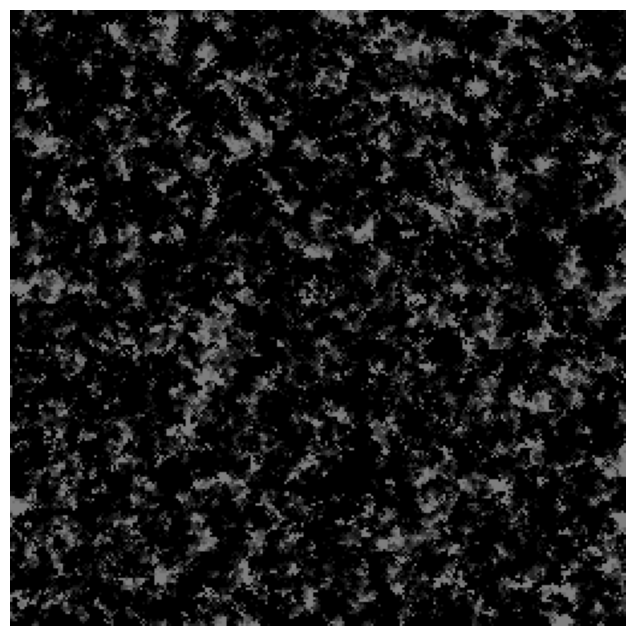

In [13]:
# this cell must be run for every change
def visualize_array(arr, fig, ax):
    ax.clear()

    image = np.zeros((256, 256, 3), dtype=np.uint8)
    for i in range(256):
        for j in range(256):
            pixel_type = arr[i, j].pixel_type
            if pixel_type == 0:
                color_palette = type0_palette
            else:
                color_palette = type1_palette

            age = arr[i, j].age
            if age >= len(color_palette):
                color = color_palette[-1]  # if age is over 7, use the last color palette
            else:
                color = color_palette[age]  # age appropriate color
            image[i, j] = color

    ax.imshow(image)
    ax.axis('off')
    fig.canvas.draw()


fig, ax = plt.subplots(figsize=(8, 8))

update_array(pixels)
visualize_array(pixels, fig, ax)

In [ ]:
# save
for i in range(32):
    # create image
    update_array(pixels)
    visualize_array(pixels, fig, ax)

    # save iamge
    fig.savefig(f"{i}.png")

    # reset image
    ax.clear()

In [ ]:
# zip (to download)
!zip -r c.zip /content/sample_data/c

  adding: content/sample_data/c/ (stored 0%)
  adding: content/sample_data/c/0.png (deflated 4%)
  adding: content/sample_data/c/3.png (deflated 4%)
  adding: content/sample_data/c/29.png (deflated 5%)
  adding: content/sample_data/c/8.png (deflated 5%)
  adding: content/sample_data/c/22.png (deflated 5%)
  adding: content/sample_data/c/27.png (deflated 5%)
  adding: content/sample_data/c/28.png (deflated 5%)
  adding: content/sample_data/c/20.png (deflated 5%)
  adding: content/sample_data/c/30.png (deflated 5%)
  adding: content/sample_data/c/12.png (deflated 5%)
  adding: content/sample_data/c/7.png (deflated 5%)
  adding: content/sample_data/c/13.png (deflated 5%)
  adding: content/sample_data/c/18.png (deflated 5%)
  adding: content/sample_data/c/2.png (deflated 4%)
  adding: content/sample_data/c/19.png (deflated 5%)
  adding: content/sample_data/c/23.png (deflated 5%)
  adding: content/sample_data/c/1.png (deflated 4%)
  adding: content/sample_data/c/4.png (deflated 5%)
  adding